# Introduction to Clustering

The field of Machine Learning is broadly categorized into **_4_** main approaches, as illustrated below.

---

$
\text{🤖 Machine Learning}
\begin{cases}
  \text{🧑‍🏫 Supervised Learning} \\
  \text{🧩 Unsupervised Learning} \\
  \text{⚖️ Semi-supervised Learning} \\
  \text{🕹️ Reinforcement Learning}
\end{cases}
$

---

This report will focus on **Clustering**, one of the primary tasks within the **'Unsupervised Learning'**.

In many machine learning tasks, particularly in **'Supervised Learning'**, the primary goal is a prediction. An algorithm is trained on labeled data to predict an output, such as assigning a label to new, unseen data.

From the other hand, **'Clustering'** is not designed to predict a specific output. Instead, its objective is to discover structures within the data by organizing it into meaningful groups, or "clusters."

---

# A real world example

## Bank Example: Finding Risky Customers

Banks use clustering to figure out which customers are financially similar and what risk they pose.

*   **Goal:** Group customers to manage financial risk.
*   **Input:** The bank uses unlabeled financial data like a customers income, debt, and payment history, age and ....
*   **Clustering Action:** The algorithm automatically sorts all customers into distinct groups, such as a **"Low-Risk"** cluster and a **"High-Risk"** cluster.
*   **Impact:** The bank can then use these groups to make decisions. For example, they can offer their best interest rates and products to the Low-Risk group while restricting loans or services to the High-Risk group.

---

## Where to use clustering

*   **Exploring data analysis**
*   **Summary generation**
*   **Outlier detection**
*   **Finding duplicates**
*   **Pre-processing data**

---

Now that you know the main idea about clustering, let's dive into the scientiffic parts.

For all algorithms in clustering, we actually want to find similarities and dissimilarities.

You might wonder why we need dissimilarities! Well the answer is straightforward. As you can see in the image below, we are trying to cluster similar items that are as close as possible together. From the other hand, we are trying to maximize the clusters distances from each other. Look at the image below to see it clearly:

---

![](assets/intra_inter.png)

---

As you can see, the yellow items are trying to stick together and stay close, but the green and bule ones are trying to get as far as possible! If we somehowe manage to maximize the **'intra-distances'** and also minimize **'inter-distances'**, we can claim that we are on the right track in clustering.

So, the goals are:

$$\text{Dis} (x_1, x_2) \downarrow$$
*(Minimize the distance between points $\mathbf{x_1}$ and $\mathbf{x_2}$ in the same cluster)*

$$\text{Dis} (c_1, c_2) \uparrow$$
*(Maximize the distance between clusters $\mathbf{c_1}$ and $\mathbf{c_2}$)*

---

### What is distance and how to measure that?

Well, there are many different ways to measure distances between 2 points in vector environment such as :

*   **Euclidean**
*   **Cosine**
*   **Average distance**

and ...

For now, we are going to talk about '**Euclidean**'

In mathematics, the Euclidean distance between two points in Euclidean space is the length of the line segment between them. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, and therefore is occasionally called the Pythagorean distance.

You can see it clearly in the image below:

---

![](assets/euclidean_distance.jpg)

---

So, it's just simple math. We find the difference of different items like this.

$$
\text{Dis}(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
$$

You might ask why we add some more steps like changing the numbers to its second power and then used a radical on all of it. Well, we always try to normalize our data with this method, so that we bring our data on the normal curve. It is always a good practice to do that.

---

### Example Distance Calculation (Euclidean)

Imagine we have two data points (e.g., two customers) measured by two features: **Feature A** and **Feature B**.

| Feature | Point $x_i$ | Point $x_j$ |
| :---: | :---: | :---: |
| **Feature A** | 2 | 5 |
| **Feature B** | 8 | 4 |

To calculate the Euclidean distance between $x_i$ and $x_j$, we follow the steps of the formula:

**1. Calculate the difference and square it for each feature:**

*   **Feature A:** $(2 - 5)^2 = (-3)^2 = 9$
*   **Feature B:** $(8 - 4)^2 = (4)^2 = 16$

**2. Sum the squared differences and take the square root:**

The calculation for the distance is as follows:

$$
\text{Dis}(x_i, x_j) = \sqrt{(2-5)^2 + (8-4)^2}
$$

$$
\text{Dis}(x_i, x_j) = \sqrt{9 + 16} = \sqrt{25} = 5
$$

The distance between the two points is **5**. This single number is what the clustering algorithm uses to determine how similar $x_i$ and $x_j$ are. A lower distance means higher similarity.

---

All right, now that we know the main concepts, lets' dive into our very first algorithm, called '**_K-means_**'

## K-Means Algorithm: How the Grouping is Done

K-Means is the most popular and straightforward algorithm for clustering. It is a **centroid-based** algorithm, meaning it relies on finding the center points of the clusters.

The algorithm is iterative, following a few simple steps:

### The K-Means Steps

1.  **Decide on K:** We first decide on the value of **K**, which is the total number of clusters (groups) we want to find. (*For example, K=3*).

2.  **Initialize Centroids:** The algorithm randomly chooses $K$ points in the dataset to act as the initial center points, or **Centroids**.
    > ![](assets/kmeans_step1_initial.png)

3.  **Assign Points (The Assignment Step):** The algorithm assigns every single data point to the cluster of the **closest Centroid**. This "closeness" is calculated using the distance formula (like Euclidean distance).

    > ![](assets/kmeans_step2_assignment.png)

4.  **Update Centroids:** After all points are assigned, the algorithm moves the Centroid of each cluster to the true center (the **mean position**) of all the points currently assigned to it.

5.  **Iterate:** Steps 3 and 4 repeat until the centroids stop moving significantly. This indicates the clusters have stabilized, and the algorithm has **converged**.

    > ![](assets/kmeans_step3_converged.png)

### The Objective Function (Minimizing Error)

The entire K-Means process is an attempt to make the clusters as "tight" as possible by minimizing the **Sum of Squared Errors (SSE)**.

$$
\text{SSE} = \sum_{i=1}^{n} (x_i - c_j)^2
$$

This formula calculates the total squared distance between every data point ($x_i$) and the center ($c_j$) of its cluster. The algorithm keeps running until this total error value is minimized.

### Important Notes on K-Means

K-Means is fast, but it has a crucial limitation:

*   **Local Optimum:** Because the initial centroids are chosen randomly, K-Means does not guarantee that it will find the absolute best grouping (the global optimum). It might only find a **local optimum**—a good solution for that specific random start.

**The Fix:** The standard practice is to **run the K-Means algorithm many times** (e.g., 20 or 50 times) with different random starting points and then choose the final clustering result that has the **lowest overall SSE**.

---

## Find the best value for the variable "**_K_**"

Ok! We know how the system works, but how can we find the **_"K"_**? I mean we can give a number like 3 or 4 or ... anything, but it does not really make sense to give at randomly. Well, don't worry; we have a solution for that.

As you know if we have _n_ instances, we can have from one up to _n_ clusters. But if we think logically, we cannot have _n_ clusters! Otherwise, what is the point of clustering at all?! From the other hand, we cannot have one cluster too! So we have to discuss the best **_"K"_** for this.

The first solution is to test the algorithm with different **_"K"s_**. Each that has better results and less error, has a higher chance of being the best model out there.

The other solution is to draw a plot. The image below is called the "Elbow method"

---

![](assets/elbow_method.png)

---

As seen in the image, the **_"K"_** value from 1 to 3 is getting a good decreasing **mean distance**. But right from **_K_** = **_4_**, the incline is getting lower. In this case, we say that **_K_** = **_3_** seems to be the best **_"K"_** out there!

---

Enough theory! Let's do a quick lab here to see what's going on in action.

# Diving into code

**_Note that_** The following dataset is coming from IBM

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

### Load Data From CSV File

Before working with our data, let's load the customers segmentation csv file and look at the main structure of the data.

In [8]:
import pandas as pd
cust_df = pd.read_csv("data/customer_segmentation.csv")
cust_df.head(6)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9


## Pre processing data

We actually don't need "**_Address_**" in here because it does not matter at all.


In [9]:
df = cust_df.drop(columns=["Address"])
df.head(6)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,6,40,1,23,81,0.998,7.831,NaN,10.9


### Let's normalize our data a little bit.

Why?

Well Imagine you have a dataset about customers with two features:

*   **Age:** (e.g., from 20 to 70)
*   **Income:** (e.g., from 30,000 to 150,000)

Now, imagine you are the K-Means algorithm trying to calculate the distance between two customers. A difference of **10** in age (e.g., 30 vs 40) is quite significant. But a difference of **10** in income (e.g., \$50,000 vs \$50,010) is tiny and meaningless.

Because the numbers for **Income** are so much bigger, any distance calculation will be completely dominated by the Income feature. The algorithm will essentially ignore Age, not because Age is unimportant, but because its numerical contribution to the distance is just too small to matter.

It's like comparing apples and oranges. The algorithm can't make a fair comparison.

### The Solution: StandardScaler

`StandardScaler` fixes this problem. For each feature, it does the following:

1.  It calculates the average (mean) and the standard deviation.
2.  It then transforms each value so that the new average of the feature is **0** and the new standard deviation is **1**.

### The Result

After using `StandardScaler`, your data might look something like this:

| Feature | Original Value | Scaled Value |
| :--- | :--- | :--- |
| **Age** | 35 | -0.52 |
| **Income** | 90,000 | 1.25 |
| **Age** | 25 | -1.50 |
| **Income** | 45,000 | -0.80 |

Now, a change of "1" in the scaled Age is just as significant as a change of "1" in the scaled Income. All features are now on a level playing field and have an equal chance to influence the clustering result.


## A quick example :

Imagine we have a small dataset with just one feature: **Age**.

**Our Raw Data (Original Ages):**
`[25, 30, 35, 40, 50]`

`StandardScaler` follows a two-step process to find the "ingredients" it needs, and a final step to apply the transformation.

### Step 1: Calculate the Mean (the Average)

First, we find the average of our data.

$$
\text{Mean (μ)} = \frac{25 + 30 + 35 + 40 + 50}{5} = \frac{180}{5} = 36
$$

So, the average age is **36**.

### Step 2: Calculate the Standard Deviation (the "Spread")

Next, we calculate how spread out the data is. This takes a few sub-steps:

1.  For each number, subtract the mean (36) and square the result.
    *   $(25 - 36)^2 = (-11)^2 = 121$
    *   $(30 - 36)^2 = (-6)^2 = 36$
    *   $(35 - 36)^2 = (-1)^2 = 1$
    *   $(40 - 36)^2 = (4)^2 = 16$
    *   $(50 - 36)^2 = (14)^2 = 196$
2.  Find the average of these squared results.
    *   $\frac{121 + 36 + 1 + 16 + 196}{5} = \frac{370}{5} = 74$
3.  Take the square root of that average.
    *   $\sqrt{74} \approx 8.6$

So, the standard deviation (σ) is approximately **8.6**.

### Step 3: Apply the StandardScaler Transformation

Now we have our two "ingredients": **Mean (μ) = 36** and **Standard Deviation (σ) = 8.6**.

The formula for `StandardScaler` is:

$$
\text{Scaled Value} = \frac{\text{Original Value} - \text{Mean}}{\text{Standard Deviation}}
$$

Let's apply this to every one of our original age values:

| Original Age | Calculation | Scaled Age |
| :---: | :---: | :---: |
| **25** | (25 - 36) / 8.6 | **-1.28** |
| **30** | (30 - 36) / 8.6 | **-0.70** |
| **35** | (35 - 36) / 8.6 | **-0.12** |
| **40** | (40 - 36) / 8.6 | **0.47** |
| **50** | (50 - 36) / 8.6 | **1.63** |

### What We Achieved

We successfully transformed our original data into a new, scaled version:

*   **Original Data:** `[25, 30, 35, 40, 50]`
*   **Scaled Data:** `[-1.28, -0.70, -0.12, 0.47, 1.63]`

This new set of numbers has a **mean of 0** and a **standard deviation of 1**, and it's now ready to be used in a distance-based algorithm like K-Means without any risk of bias due to its scale.

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:,1:] # From Customer Id all the way to the DebtIncomeRatio
X = np.nan_to_num(X) # NAN values -> 0, infinite -> A very large number
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]], shape=(850, 8))

#### Modeling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take look at cluster labels.

In [11]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 30)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 1 2 0 1 1 0 0 0 1 2 0 0 0 2 0 0 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 2 0 0 0 2
 2 0 1 2 1 0 1 0 1 0 0 0 0 1 1 2 0 2 2 2 0 0 0 1 0 1 1 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 1 0 0 2 1 0 1 0 0 0 2 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 2 1 0 0 0 0 0
 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2
 0 0 0 1 2 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 2 1 2 0 0 1 2
 1 0 0 0 0 0 1 0 2 0 0 0 1 1 0 1 0 2 0 0 2 0 1 0 2 0 0 0 0 0 2 2 1 0 0 2 1
 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 2 0 2 0
 0 0 1 0 2 1 2 0 1 0 0 2 0 0 0 0 2 2 2 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 2 0 0
 2 0 2 1 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 1 0 2 0 0 0 2 2 0 0 0 1 2
 0 0 2 0 1 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 2 0 2 0 0 0 1 1 0
 2 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 2 0 0 2 2
 1 0 0 0 0 0 2 2 0 1 2 1 0 0 2 0 0 1 1 0 2 0 0 1 0 2 0 1 0 0 0 1 0 0 0 0 1
 0 2 0 0 0 0 1 2 0 0 1 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0 0 0 2 0
 2 0 0 0 0 0 1 2 2 0 1 0 

In [12]:
df["Clustered Label"] = labels
df.head(6)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clustered Label
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
5,6,40,1,23,81,0.998,7.831,NaN,10.9,1


In [13]:
overal_view = df.groupby("Clustered Label").mean().drop(columns=["Customer Id"])
overal_view

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clustered Label,,,,,,,,
0,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


### Let's show the data on the plot

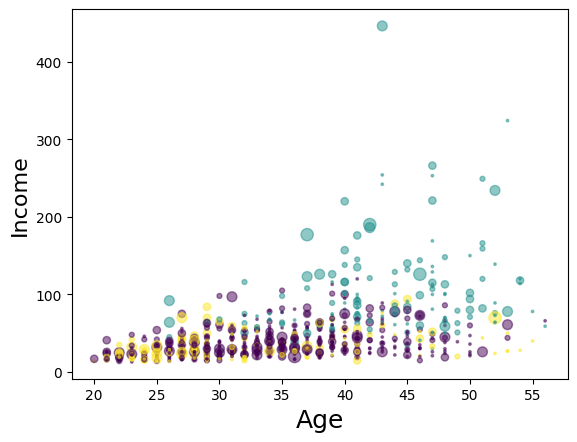

In [23]:
import matplotlib.pyplot as plt

area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

### Why **_K = 3_** ?

Well, as we have discussed before, we have elbow method in K-means algorithm. so let's do the same in here as well to see the result:

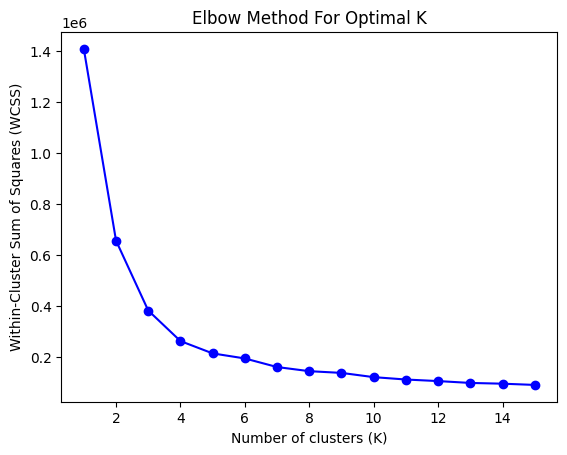

In [30]:
wcss = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is WCSS

plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()


As you can see, the diagram has a lower inclinde decrease at point 3. This confirms that this is a good trade-off bewtween complexity and performance!

How ever you might get better results for **_K = 4_** as well. you can test that yourself. why don't you try that out yourself again?

Anyway, that was all about K-means. Let's dive into the next algorithm called **_Hierarchial_**